# Analisis Populasi Kendaraan Listrik

Notebook ini berisi analisis mendalam terhadap dataset *Electric Vehicle Population Data*.  
Tujuan utama analisis ini adalah memahami tren pertumbuhan kendaraan listrik, distribusi merk, faktor harga, serta pola adopsi berdasarkan lokasi.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from src.data_preprocessing import load_data

df = load_data("dataset/Electric_Vehicle_Population_Data.csv")

## Tren Pertumbuhan EV per Tahun

Dari grafik di bawah terlihat bahwa jumlah EV meningkat signifikan mulai tahun 2018.  
Tipe kendaraan listrik yang paling banyak bertumbuh adalah **Battery Electric Vehicle (BEV)** dibandingkan **Plug-in Hybrid Electric Vehicle (PHEV)**.  
Hal ini menunjukkan adanya pergeseran preferensi konsumen menuju EV murni (tanpa mesin bensin).


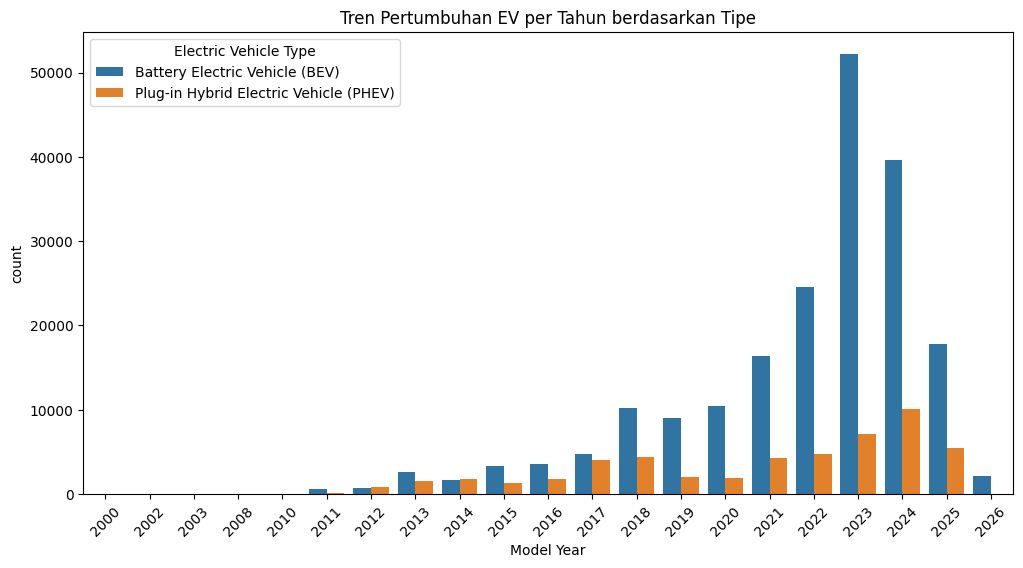

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Model Year", hue="Electric Vehicle Type", order=sorted(df["Model Year"].dropna().unique()))
plt.title("Tren Pertumbuhan EV per Tahun berdasarkan Tipe")
plt.xticks(rotation=45)
plt.show()

## Distribusi Merk EV

Top 5 merk EV didominasi oleh Tesla, Nissan, Chevrolet, Ford, dan BMW.  
Tesla mendominasi terutama pada model dengan *electric range* yang tinggi, sementara Nissan Leaf banyak ditemukan pada kendaraan dengan harga lebih terjangkau.


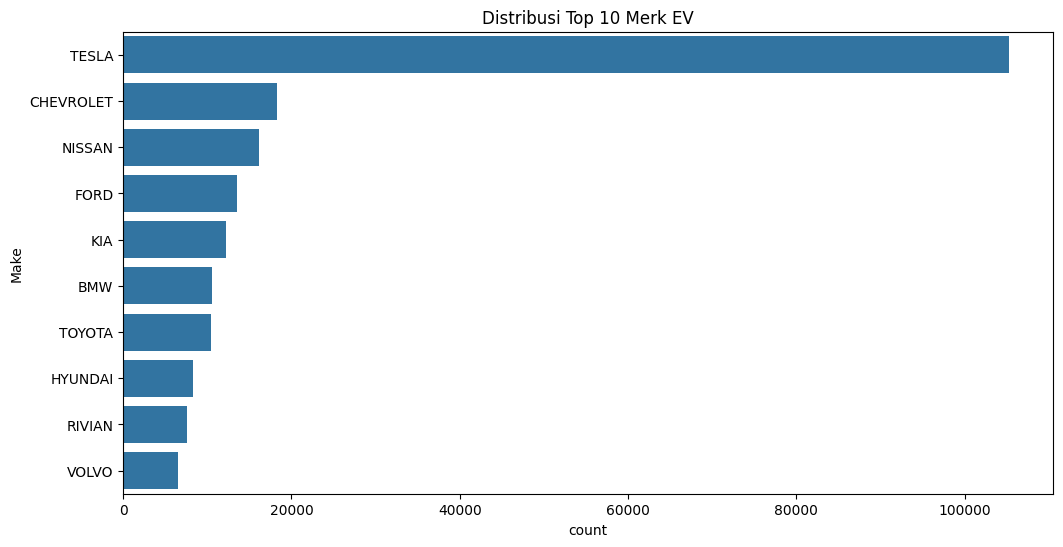

In [6]:
top_makes = df['Make'].value_counts().head(10).index

plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Make'].isin(top_makes)], y="Make", order=top_makes)
plt.title("Distribusi Top 10 Merk EV")
plt.show()


## Persebaran EV Berdasarkan Lokasi

EV lebih banyak terkonsentrasi di county/kota besar, terutama di area urban dengan infrastruktur pendukung yang lebih baik. Hal ini konsisten dengan pola adopsi awal teknologi, di mana wilayah metropolitan biasanya menjadi pusat penetrasi EV.


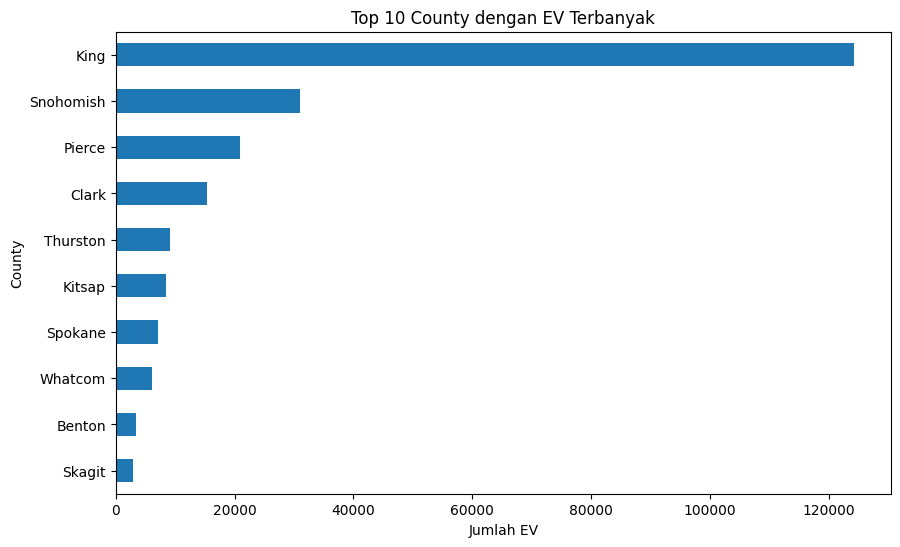

In [9]:
top_counties = df['County'].value_counts().head(10).sort_values()

plt.figure(figsize=(10,6))
top_counties.plot(kind='barh')
plt.title("Top 10 County dengan EV Terbanyak")
plt.xlabel("Jumlah EV")
plt.ylabel("County")
plt.show()


## Jangkauan Jarak Tempuh Kendaraan Berdasarkan Harga

Distribusi EV menunjukkan dominasi kendaraan dengan jangkauan <100 mil, menandakan banyaknya model PHEV atau BEV awal yang berfokus pada perjalanan pendek. Jumlahnya menurun drastis pada kategori 100–200 mil, namun kembali meningkat pada 200–300 mil, mencerminkan mulai bergesernya tren ke EV dengan kapasitas baterai lebih besar. Sementara itu, kendaraan dengan jangkauan >300 mil masih sangat sedikit, sehingga adopsinya masih terbatas pada model premium atau teknologi terbaru.

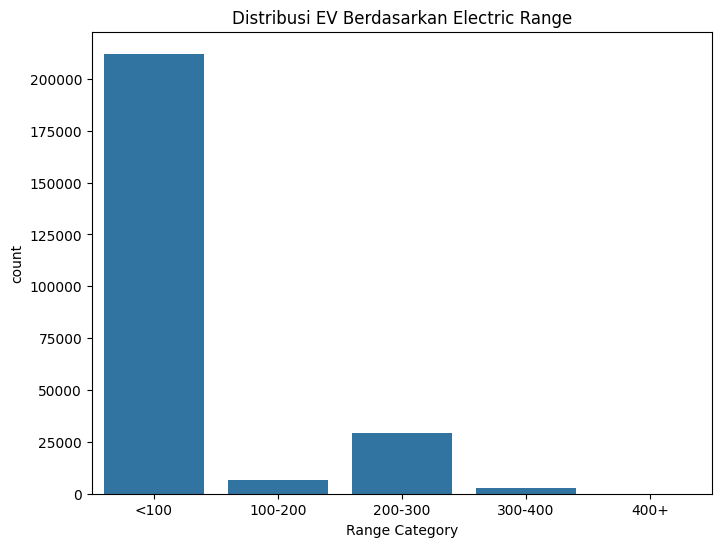

In [10]:
bins = [0, 100, 200, 300, 400, 1000]
labels = ["<100", "100-200", "200-300", "300-400", "400+"]
df["Range Category"] = pd.cut(df["Electric Range"], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Range Category", order=labels)
plt.title("Distribusi EV Berdasarkan Electric Range")
plt.show()


## Penyedia Layanan Listrik (Electric Utiliy) dengan Jumlah EV Terbanyak
Puget Sound Energy Inc bersama City of Tacoma (WA) menempati posisi teratas dengan hampir 90 ribu EV, diikuti oleh Puget Sound Energy Inc sendiri dengan lebih dari 50 ribu EV, serta City of Seattle (WA) bersama City of Tacoma dengan sekitar 40 ribu EV. Secara keseluruhan, distribusi ini menunjukkan bahwa kepemilikan EV masih terkonsentrasi pada beberapa penyedia listrik besar di wilayah Washington, sementara utilitas lainnya memiliki jumlah yang jauh lebih sedikit.

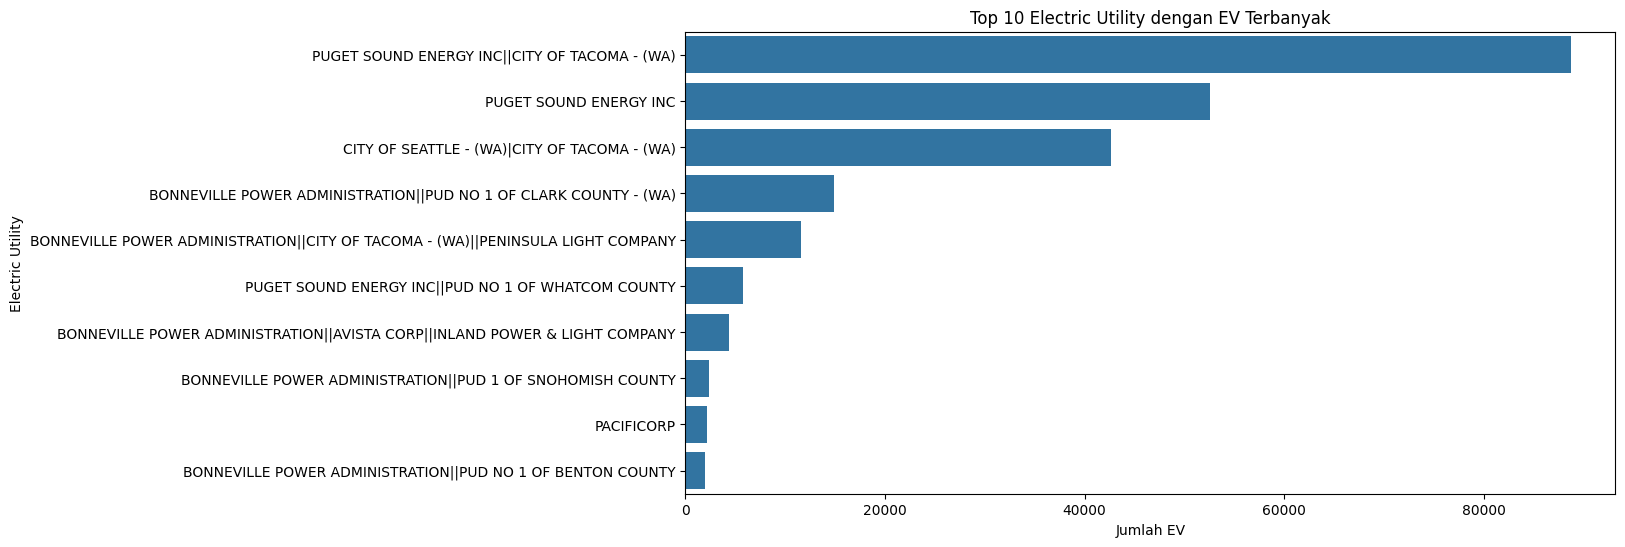

In [12]:
top_utilities = df['Electric Utility'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_utilities.values, y=top_utilities.index)
plt.title("Top 10 Electric Utility dengan EV Terbanyak")
plt.xlabel("Jumlah EV")
plt.ylabel("Electric Utility")
plt.show()


## Persebaran Kendaraan EV Berdasarkan Harga
Mayoritas kendaraan listrik berada di kelas low-end (<30 ribu USD) dengan jumlah hampir 250 ribu unit, jauh mendominasi dibanding segmen lainnya. Sementara itu, segmen mid-range (30k–60k USD) dan high-end (>60k USD) hanya memiliki jumlah yang sangat kecil, masing-masing hanya beberapa ribu unit. Hal ini mengindikasikan bahwa populasi EV dalam dataset masih didominasi oleh model yang relatif terjangkau, sedangkan kendaraan listrik dengan harga menengah hingga premium masih terbatas dan belum banyak diadopsi.

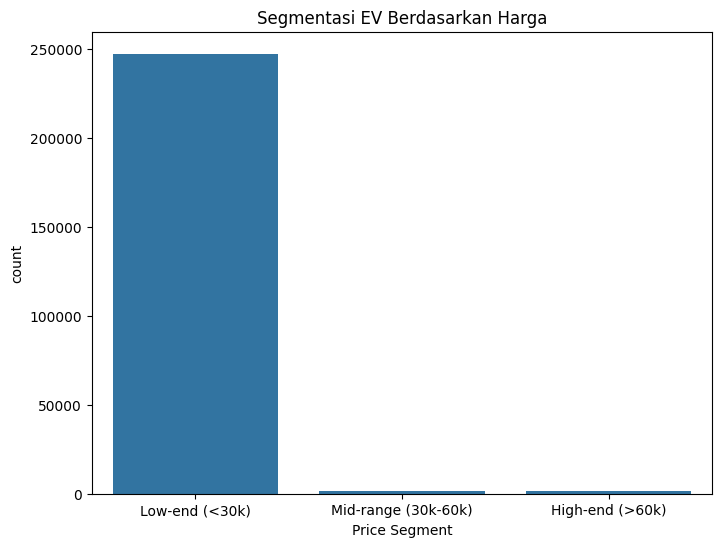

In [13]:
def categorize_price(msrp):
    if msrp < 30000:
        return "Low-end (<30k)"
    elif 30000 <= msrp <= 60000:
        return "Mid-range (30k-60k)"
    else:
        return "High-end (>60k)"

df["Price Segment"] = df["Base MSRP"].apply(categorize_price)

plt.figure(figsize=(8,6))
sns.countplot(data=df, x="Price Segment", order=["Low-end (<30k)", "Mid-range (30k-60k)", "High-end (>60k)"])
plt.title("Segmentasi EV Berdasarkan Harga")
plt.show()


# Kesimpulan

1. Jumlah kendaraan listrik meningkat signifikan sejak tahun 2018, dengan pertumbuhan terbesar berasal dari Battery Electric Vehicle (BEV) dibandingkan Plug-in Hybrid Electric Vehicle (PHEV), menunjukkan adanya pergeseran preferensi konsumen menuju kendaraan listrik murni.  

2. Pasar kendaraan listrik didominasi oleh Tesla, Nissan, Chevrolet, Ford, dan BMW, di mana Tesla unggul pada model dengan jangkauan tinggi sementara Nissan Leaf banyak ditemukan di segmen harga lebih terjangkau.  

3. Sebaran kendaraan listrik lebih banyak terkonsentrasi di kota besar atau area urban yang memiliki infrastruktur pendukung lebih baik, sesuai dengan pola adopsi awal teknologi baru.  

4. Mayoritas kendaraan listrik memiliki jangkauan kurang dari 100 mil yang umumnya berupa PHEV atau BEV generasi awal, namun tren mulai bergeser ke rentang 200–300 mil, sedangkan kendaraan dengan jangkauan lebih dari 300 mil masih terbatas pada segmen premium.  

5. Kepemilikan kendaraan listrik masih terkonsentrasi pada penyedia listrik besar di wilayah Washington, khususnya Puget Sound Energy Inc dan City of Tacoma, dengan jumlah jauh lebih banyak dibanding utilitas lainnya.  

6. Sebagian besar kendaraan listrik berada di segmen harga rendah di bawah 30 ribu USD dengan hampir 250 ribu unit, sementara segmen menengah (30k–60k USD) dan premium (>60k USD) hanya mencatat jumlah yang sangat kecil, menandakan adopsi masih didominasi oleh model yang lebih terjangkau.  
